# Taniya Kapoor

# UQ Project Part III - Antithetic Variates Part

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
R = 1000

br = 1.2               #Remanent magnetic flux density of the magnet (T)
br_min = br - 0.05*br
br_max = br + 0.05*br
br = np.random.uniform(br_min, br_max, R)  
br_prime = br_min + br_max - br
#br=np.random.normal((br_min+br_max)/2, (br_max-br_min)**2/12, R)    

e=0.5e-3             #air gap between the core and the yoke (m)
e_min = e - 0.15*e
e_max = e + 0.15*e
e = np.random.uniform(e_min,e_max,R)
e_prime = e_min + e_max - e
#e = np.random.normal((e_min+e_max)/2, (e_max-e_min)**2/12, R)


ep=5e-5  #Parasitic air gap (m)
ep_min = ep - 0.4*ep
ep_max = ep + 0.4*ep
ep = np.random.uniform(ep_min,ep_max,R)
ep_prime = ep_min + ep_max - ep
#ep = np.random.normal((ep_min+ep_max)/2, (ep_max-ep_min)**2/12, R)


haim=10e-3    #height of the magnet (m)
haim_min = haim - 0.05*haim
haim_max = haim + 0.05*haim
haim = np.random.uniform(haim_min,haim_max,R)
haim_prime = haim_min + haim_max - haim
#haim = np.random.normal((haim_min+haim_max)/2, (haim_max-haim_min)**2/12, R)


current=0.0652                                  #current in the coil
current_min = current - 0.1*current
current_max = current + 0.1*current
current = np.random.uniform(current_min,current_max,R)  
current_prime = current_min + current_max - current
#current = np.random.normal((current_min+current_max)/2, (haim_max-haim_min)**2/12, R)



In [3]:
rcul=8.8e-3                                        #radius of the iron core (m)
rbob=17e-3                                        #external radius of the coil (m)
rclo=20e-3                                        #external radius (m)
raim=9.4e-3                                      #Radius of the magnet (m)
hclo=6e-3                                       #height of base of the yoke (m)
hent=6e-3                                      #height of the air gap e (m)
hbob=9e-3                                       #height of the coil (m)
hpm=5e-3                                        #height of the mobil plate (m)
mur=3000                                        #relative permeability of the yoke
n=3200                                        #number of turns
#CONSTANTS
#permeability of the air
mu0=4*np.pi*1e-7
Re=e/(mu0*2*np.pi*(rbob-e)*hent)                                  #reluctance of the airgap
Rp=ep/(mu0*np.pi*rcul*rcul)+ep/(mu0*np.pi*(rclo*rclo-rbob*rbob))  #reluctance of the paraistic airgap
Ra=haim/(mu0*np.pi*raim*raim)                                     #reluctance of the magnet
ksia=br*haim/mu0                                                #magnetomotive force of the magnet
#Not supplied
#Calculation of the flux
#flux flowing through the permanent magnet
phia1=((Rp+Re)*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
#magnetic flux in the mobil plate
phib1=-(Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
force1=np.abs((phib1*phib1)/(2*mu0*np.pi*rcul*rcul)+phib1*phib1/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))
#Supplied by a current
#Calculation of the flux
#flux flowing through the permanent magnet
phia2=((Rp+Re)*(ksia)-(Re*n*current))/((Ra*Rp)+(Ra*Re)+(Re*Rp))
#magnetic flux in the mobil plate
phib2=((Ra+Re)*n*current-Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
#calculation of the force
force2=np.abs((phib2*phib2)/(2*mu0*np.pi*rcul*rcul)+phib2*phib2/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))

In [4]:
mu0=4*np.pi*1e-7
Re_prime=e_prime/(mu0*2*np.pi*(rbob-e)*hent)                                  #reluctance of the airgap
Rp_prime=ep_prime/(mu0*np.pi*rcul*rcul)+ep_prime/(mu0*np.pi*(rclo*rclo-rbob*rbob))  #reluctance of the paraistic airgap
Ra_prime=haim_prime/(mu0*np.pi*raim*raim)                                     #reluctance of the magnet
ksia_prime=br_prime*haim_prime/mu0                                                #magnetomotive force of the magnet
#Not supplied
#Calculation of the flux
#flux flowing through the permanent magnet
phia1_prime=((Rp_prime+Re_prime)*ksia_prime)/(Ra_prime*Rp_prime+Ra_prime*Re_prime+Re_prime*Rp_prime)
#magnetic flux in the mobil plate
phib1_prime=-(Re_prime*ksia_prime)/(Ra_prime*Rp_prime+Ra_prime*Re_prime+Re_prime*Rp_prime)
force1_prime=np.abs((phib1_prime*phib1_prime)/(2*mu0*np.pi*rcul*rcul)+phib1_prime*phib1_prime/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))
#Supplied by a current
#Calculation of the flux
#flux flowing through the permanent magnet
phia2_prime=((Rp_prime+Re_prime)*(ksia_prime)-(Re_prime*n*current_prime))/((Ra_prime*Rp_prime)+(Ra_prime*Re_prime)+(Re_prime*Rp_prime))
#magnetic flux in the mobil plate
phib2_prime=((Ra_prime+Re_prime)*n*current-Re_prime*ksia_prime)/(Ra_prime*Rp_prime+Ra_prime*Re_prime+Re_prime*Rp_prime)
#calculation of the force
force2_prime=np.abs((phib2_prime*phib2_prime)/(2*mu0*np.pi*rcul*rcul)+phib2_prime*phib2_prime/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))

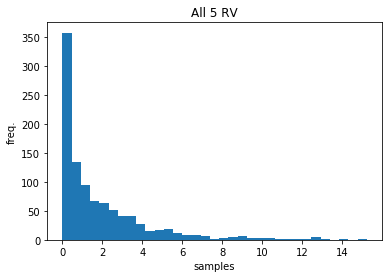

In [6]:
m1 = np.mean(force1)
m1_prime = np.mean(force1_prime)
m2 = np.mean(force2)
m2_prime = np.mean(force2_prime)

M1 = 0.5*(m1+m1_prime)
M2 = 0.5*(m2+m2_prime)

s1 = np.std(force1)
s1_prime = np.std(force1_prime)
s2 = np.std(force2)
s2_prime = np.std(force2_prime)

S1 = 0.5*(s1+s1_prime)
S2 = 0.5*(s2+s2_prime)

S1 = s1/np.sqrt(R)
S2 = s2/np.sqrt(R)

#plt.hist(force1,bins = 'auto')
plt.hist(force2, bins = 'auto')
#plt.show()
#print("mean for Force1",M1)
#print("mean for Force2",M2)
#print("standard deviation for force1 by sqrt R",S1)
#print("standard deviation for force2 by sqrt R",S2)

plt.title("All 5 RV")
plt.xlabel('samples')
plt.ylabel('freq.')
plt.savefig("anti_all_force2.jpg")
